In [1]:
import matplotlib.pyplot as plt
import numpy
%matplotlib inline
#n=1000 for pure components, 2000 for mixtures
#log columns: 0t 1pe 2ke 3T 4P 5V
def pure_enthalpy(filename):
    n=1000
    d = numpy.loadtxt(filename,skiprows=50)
    U = d[:,1]+d[:,2]
    PV = d[:,4]*d[:,5]
    H = U+PV
    return H.mean()/n
def mix_enthalpy(filename):
    n=2000
    d = numpy.loadtxt(filename,skiprows=50)
    U = d[:,1]+d[:,2]
    PV = d[:,4]*d[:,5]
    H = U+PV
    return H.mean()/n

Text(0.5, 0, 'xA')

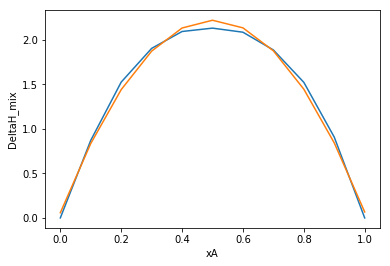

In [3]:
T=1.9
pureA= pure_enthalpy("A-"+str(T)+".log") #get the pure molal enthalpy of A
pureB = pure_enthalpy("B-"+str(T)+".log") # get the pure molal enthalpy of B
#Note: We're first calculating the Enthalpies of mixing, NOT the change in enthalpy of mixing
Hmix=[pureB] #initialize our array of mixing enthalpies with pureB (xA=0) 
for x in "123456789": # loop over concentrations
    Hmix.append(mix_enthalpy("AB-"+str(T)+"-"+x+".log")) #and calculate their mixing enthalpies 
Hmix.append(pure_enthalpy("A-"+str(T)+".log")) #add on the last enthalpy, xA=1, pure A
xA = numpy.array([i/10 for i in range(11)])
#now let's get the change in enthalpy of mixing: DeltaH_mix!
DeltaH_mix = []
for i,x in enumerate(xA):
    DeltaH_mix.append(Hmix[i]-x*pureA-(1-x)*pureB)
    
#We're working towards activity, and for now, let's say that the change in the molal enthalpy of A,
#or, "DHA" = DeltaH_mix + (1-xA) * (derivative of DeltaH_mix wrt xA)
#So we need to get that derivative. to do that, let's fit a parabola to Delta_H_mix, which will be easy to differentiate
coefficients = numpy.polyfit(xA,DeltaH_mix,2) #the 2 is for a 2nd degree polynomial (parabola!)
fit_DeltaH_mix = numpy.poly1d(coefficients) #have numpy give us a function with these coefficients

#Let's check how this fit looks
plt.plot(xA,DeltaH_mix) #Data in blue
plt.plot(xA,fit_DeltaH_mix(xA)) #fit in orange
plt.ylabel("DeltaH_mix")
plt.xlabel("xA")

Text(0.5, 0, 'xA')

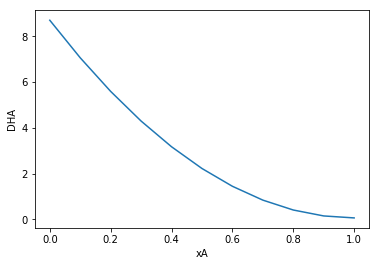

In [4]:
#      ^------That parabola is not bad! At least at T=1.9, anyway.
#Now check this out, we can get the change in molal enthalpy of A (DHA) using the info we have so far
#first, a helper line:
one_minus_xA = numpy.poly1d([-1,1]) #this is how numpy thinks of the polynomial (1-xA)

#This is equation 8.29 in the book using Enthalpy for B:
DHA = fit_DeltaH_mix + one_minus_xA * fit_DeltaH_mix.deriv()
plt.plot(xA,DHA(xA))
plt.ylabel("DHA")
plt.xlabel("xA")

Text(0.5, 0, 'xB')

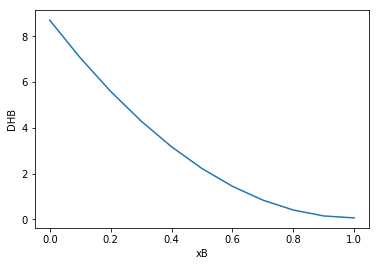

In [5]:
#      ^-------This also looks real nice: 
#When we have pure A, the change in molal enthalpy of A is close to 0, a nice sanity check
#And as we lower the concentration of A, DHA shoots up: A really pretends there's a whole lot more of it
#than there really is when it is mixed with B, at T=1.9

#Speaking of, let's get this for B!
#This is kindof quick, since we know that 1-xB = xA
xB = numpy.array([i/10 for i in range(11)])
one_minus_xB = numpy.poly1d([-1,1])
DHB = fit_DeltaH_mix(one_minus_xB) + one_minus_xB* fit_DeltaH_mix(one_minus_xB).deriv() #insert 1-xB for xA
plt.plot(xB,DHA(xB))
plt.ylabel("DHB")
plt.xlabel("xB")

Text(0.5, 0, 'xA')

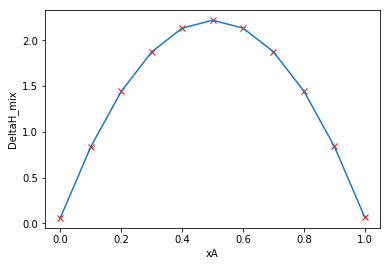

In [6]:
#      ^-----Looks the same. Not super surprising, given the symmetric DeltaH_mix
#Let's check if we get deltaH_mix back if we add up these weighted averages
plt.plot(xA,xA*DHA(xA)+(1-xA)*DHB(1-xA),'rx') #eqn 8.21, red crosses below
plt.plot(xA,fit_DeltaH_mix(xA)) #original datat in blue
plt.ylabel("DeltaH_mix")
plt.xlabel("xA")

Text(0.5, 0, 'xA')

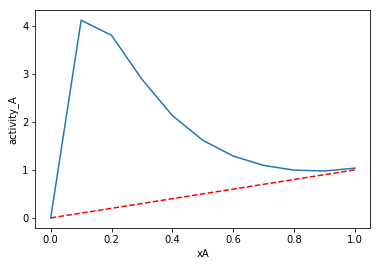

In [7]:
#       ^----TADA!

#Now the really cool thing is how DHA = the change in excess gibbs free energy of A (eqn 8.107 on p233)
#Note that in these simulations, all of the energies are in units of R, so we can get activity coeffients like this
activity_A = numpy.exp(DHA(xA)/T)*xA
activity_B = numpy.exp(DHB(1-xA)/T)*(1-xA)
plt.plot(xA,activity_A) #compare gainst figure 8.4
plt.plot(xA,xA,'r--')
plt.ylabel("activity_A")
plt.xlabel("xA")

Text(0.5, 0, 'xA')

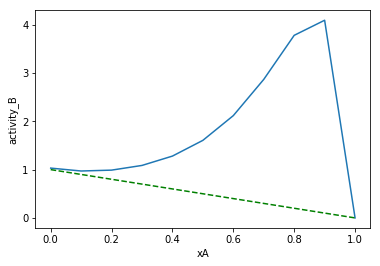

In [8]:
plt.plot(xA,activity_B)#compare against Figure 8.4
plt.plot(xA,1-xA,'g--')
plt.ylabel("activity_B")
plt.xlabel("xA")

In [ ]:
#1. Are the activity coefficients for A higher at T=1.8 or T=1.9?

In [ ]:
#2. DeltaG_mix(xA) = DeltaH_mix + T*(xA*log(xA)+xB*log(xB)) 
# For a concentration of xA=0.5, will A and B spontaneously mix at T=1.9?

In [ ]:
#3. If 1000 atoms of A are mixed with 1000 atoms of B at T=1.4, will they mix?

In [ ]:
#4. Can you calculate the mixing transition temperature for this system?